In [1]:
# lab4
# part 1 (8)

from matplotlib import pyplot as plt
from scipy import stats

data_x = [
    8, 13, 17, 6, 14, 21, 2, 16, 18, 15,
    9, 10, 7, 22, 3, 5, 12, 19, 4, 20, 11
]
data_y = [
    1.9, 1, 1, 2.2, 1.3, 0.8, 2.2, 0.9, 0.8, 1.3, 1.5,
    1.3, 1.9, 0.7, 3.1, 2.5, 1.1, 0.6, 2.8, 0.6, 1.2
]


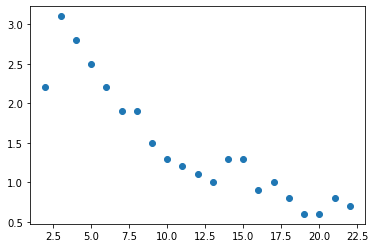

In [2]:
plt.scatter(data_x, data_y)

In [3]:
# according to scatter plot, correlation is non-linear
assert len(data_y) == len(data_x)
N = len(data_x)
x_mean = sum(data_x) / N
y_mean = sum(data_y) / N
xy_mean = sum(x * y for x, y in zip(data_x, data_y)) / N
x_dispersion = sum((i - x_mean) ** 2 for i in data_x) / N
x_standard_deviation = x_dispersion ** 0.5
y_dispersion = sum((i - y_mean) ** 2 for i in data_y) / N
y_standard_deviation = y_dispersion ** 0.5
r = (xy_mean - (x_mean * y_mean)) / (x_standard_deviation * y_standard_deviation)
t = (r * ((N - 2) ** 0.5)) / ((1 - (r ** 2)) ** 0.5)
t_quantile = 2.09
print("N =", N)
print("x mean =", x_mean)
print("y mean =", y_mean)
print("xy mean =", xy_mean)
print("x std =", x_standard_deviation)
print("y std =", y_standard_deviation)
print("r^ =", r)
print("r^ (lib) =", stats.pearsonr(data_x, data_y))
print("t statistic =", t)
print("t quantile =", t_quantile)
print(f"r^ is {'not ' if abs(t) <= t_quantile else ''}significant")


N = 21
x mean = 12.0
y mean = 1.461904761904762
xy mean = 13.52857142857143
x std = 6.0553007081949835
y std = 0.7234021409951534
r^ = -0.9164162359707279
r^ (lib) = (-0.916416235970728, 5.428794465709238e-09)
t statistic = -9.980761829733558
t quantile = 2.09
r^ is significant


In [4]:
u_quantile = 1.96
r_interval_middle = r + (r * (1 - (r ** 2)) / (2 * N))
r_interval_scatter = (u_quantile * ((1 - (r ** 2)) / ((N - 1) ** 0.5)))
r_interval = (r_interval_middle - r_interval_scatter, r_interval_middle + r_interval_scatter)
print("r^ interval =", r_interval)

r^ interval = (-0.9901138432323655, -0.8497087586107617)


In [5]:
# part 2 (9)

def get_ranks(items: list):
    sorted_items = sorted(items)
    ranks = []
    rank_sizes = []
    current_indexes_sum = 0
    current_rank_size = 0
    current_value = None
    for i in range(len(sorted_items)):
        if not current_value:
            current_value = sorted_items[i]
        if current_value == sorted_items[i]:
            current_rank_size += 1
            current_indexes_sum += (i + 1)
        else:
            ranks.extend(
                current_indexes_sum / current_rank_size for _ in range(current_rank_size)
            )
            current_value = sorted_items[i]
            current_indexes_sum = i + 1
            rank_sizes.append(current_rank_size)
            current_rank_size = 1
        if i == len(sorted_items) - 1:
            rank_sizes.append(current_rank_size)
            ranks.extend(
                current_indexes_sum / current_rank_size for _ in range(current_rank_size)
            )
    rank_map = {i: j for i, j in zip(sorted_items, ranks)}
    return rank_sizes, [rank_map[i] for i in items]

x_rank_sizes, x_ranks = get_ranks(data_x)
y_rank_sizes, y_ranks = get_ranks(data_y)
pairs = sorted(((x, y) for x, y in zip(x_ranks, y_ranks)), key = lambda pair: pair[0])
x_ranks = [i[0] for i in pairs]
y_ranks = [i[1] for i in pairs]

x_ranks_mean = sum(x_ranks) / N
y_ranks_mean = sum(y_ranks) / N
xy_ranks_mean = sum(x * y for x, y in zip(x_ranks, y_ranks)) / N
x_ranks_dispersion = sum((i - x_ranks_mean) ** 2 for i in x_ranks) / N
x_ranks_standard_deviation = x_ranks_dispersion ** 0.5
y_ranks_dispersion = sum((i - y_ranks_mean) ** 2 for i in y_ranks) / N
y_ranks_standard_deviation = y_ranks_dispersion ** 0.5
tau_c = (xy_ranks_mean - (x_ranks_mean * y_ranks_mean)) /\
    (x_ranks_standard_deviation * y_ranks_standard_deviation)
t_for_tau_c = (tau_c * ((N - 2) ** 0.5)) / ((1 - (tau_c ** 2)) ** 0.5)
print("x ranks:", x_ranks)
print("y ranks:", y_ranks)
print("tau_c =", tau_c)
print("tau_c (lib) =", stats.spearmanr(data_x, data_y))
print("t statistic for tau_c =", t_for_tau_c)
print(f"tau_c is {'not ' if abs(t_for_tau_c) <= t_quantile else ''}significant")


x ranks: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0]
y ranks: [17.5, 21.0, 20.0, 19.0, 17.5, 15.5, 15.5, 14.0, 12.0, 10.0, 9.0, 7.5, 12.0, 12.0, 6.0, 7.5, 4.5, 1.5, 1.5, 4.5, 3.0]
tau_c = -0.9488806622460166
tau_c (lib) = SpearmanrResult(correlation=-0.9488806622460169, pvalue=5.779595611156623e-11)
t statistic for tau_c = -13.103978257852512
tau_c is significant


In [6]:
epsilon = 0.00001
v = [[0 for _ in range(N)] for _ in range(N)]
for i in range(N):
    for j in range(N):
        if abs(x_ranks[i] - x_ranks[j]) < epsilon:
            continue
        if abs(y_ranks[i] - y_ranks[j]) < epsilon:
            continue
        v[i][j] = 1 if y_ranks[i] < y_ranks[j] else -1
S = sum(sum(v[i][j] for j in range(i + 1, N)) for i in range(0, N - 1))
# A = sum((j ** 3) - j for j in x_rank_sizes) / 12
# B = sum((k ** 3) - k for k in y_rank_sizes) / 12
C = sum(j * (j - 1) for j in x_rank_sizes) / 2
D = sum(k * (k - 1) for k in y_rank_sizes) / 2
tau_k = S / ((((1/2) * N * (N - 1) - C) * ((1/2) * N * (N - 1) - D)) ** 0.5)
u_for_tau_k = (3 * tau_k * ((N * (N - 1)) ** 0.5)) / ((2 * (2 * N + 5)) ** 0.5)
print("v:\n" + '\n'.join(
    str(i).replace('[', ' ').strip(']').replace(' ', '  ').replace('  -', ' -') for i in v
) + '\n')
print("S =", S)
print("C =", C)
print("D =", D)
print("tau_k =", tau_k)
print("tau_k (lib) =", stats.kendalltau(data_x, data_y))
print("|tau_c| > |tau_k|:", abs(tau_c) > abs(tau_k))
print("|tau_c - (3/2)tau_k| =", tau_c - (3/2) * tau_k)
print("u =", u_for_tau_k)
print(f"tau_k is {'not ' if abs(u_for_tau_k) <= u_quantile else ''}significant")

v:
  0,  1,  1,  1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1
 -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1
 -1,  1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1
 -1,  1,  1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1
  0,  1,  1,  1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1
  1,  1,  1,  1,  1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1
  1,  1,  1,  1,  1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1
  1,  1,  1,  1,  1,  1,  1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1
  1,  1,  1,  1,  1,  1,  1,  1,  0, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1
  1,  1,  1,  1,  1,  1,  1,  1,  1,  0, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1
  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1
  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1, -1,  0, -1, -1, 

In [7]:
# part 3 (10)

b = r * y_standard_deviation / x_standard_deviation
a = y_mean - b * x_mean
epsilon_dispersion = sum((y - a - (b * x)) ** 2 for x, y in zip(data_x, data_y)) / (N - 2)
sigma_a = ((epsilon_dispersion / N) * (1 + ((x_mean ** 2) / x_dispersion))) ** 0.5
sigma_b = (epsilon_dispersion / (N * x_dispersion)) ** 0.5
a_interval = (a - (t_quantile * sigma_a)), (a + (t_quantile * sigma_a))
b_interval = (b - (t_quantile * sigma_b)), (a + (t_quantile * sigma_b))
t_a = a / sigma_a
t_b = b / sigma_b
print("a^ =", a)
print("b^ =", b)
print("Se2 =", epsilon_dispersion)
print("sigma(a) =", sigma_a)
print("sigma(b) =", sigma_b)
print("t_a =", t_a)
print("t_b =", t_b)
print(f"parameter 'a' is {'not ' if abs(t_a) <= t_quantile else ''}significant")
print(f"parameter 'b' is {'not ' if abs(t_b) <= t_quantile else ''}significant")


a^ = 2.7756709956709957
b^ = -0.10948051948051948
Se2 = 0.09264821143768512
sigma(a) = 0.1474389309329222
sigma(b) = 0.010969154594428605
t_a = 18.825902888117085
t_b = -9.980761829733556
parameter 'a' is significant
parameter 'b' is significant


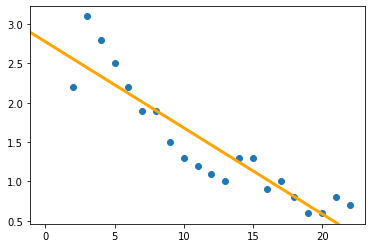

In [8]:
def get_coordinates(x, a, b):
    return x, (a + b * x)
plt.scatter(data_x, data_y)
plt.axline(
    get_coordinates(0, a, b),
    get_coordinates(20, a, b),
    color='orange',
    linewidth=3
)